<a href="https://colab.research.google.com/github/Mayandza/Projet/blob/main/Projet_Fandango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ce projet est une analyse entre le site Fandango qui bascule de fausses informations sur les votes de ses films sur internet. Nous allons aussi comparer le nombre de votes et critiques sur d'autres sites.  **

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
 fandango = pd.read_csv('/content/fandango_scrape.csv')
 all_sites = pd.read_csv('/content/all_sites_scores.csv')

In [24]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [25]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [26]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [27]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


# ***Explorons la relation qui existe entre les notes et les votes des films de fandango avec un nuage de points.***

<Axes: xlabel='RATING', ylabel='VOTES'>

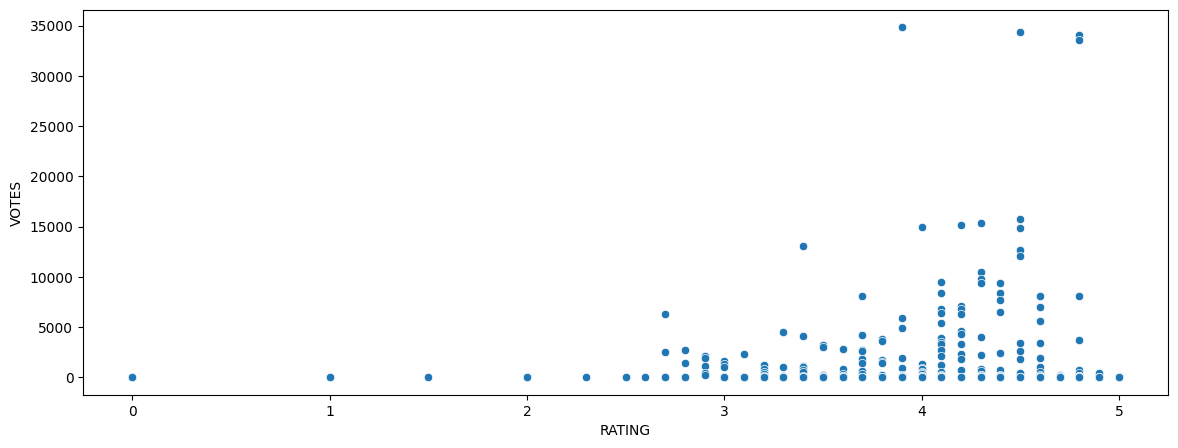

In [28]:
plt.figure(figsize=(14,5), dpi=100)
sns.scatterplot(fandango, x='RATING', y='VOTES')

# **On peut dire que sur l'ensemble de films, il y'a eu plus de critiques que de votes, cependant au moins 4 films ont eu des votes supérieuses aux autres. La relation n'est donc pas linéaire **

In [29]:
fandango.corr()

<ipython-input-29-b65df3b6d08c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


# La  relation entre les etoiles affiichées sur le site fandango n'est pas bonne. Le coefficient de correlation montre tout simplement que les deux ne sont pas corrélé. Mais pour vraiment conclure il faut mener des analyses avancées.

In [30]:
### Création d'une colonne contenant toutes les années de films.
## Extraxction de l'année dans la colonnne 'FILM'

titre = 'film brazza (2024)'
titre.split("(")[-1].replace(')', "")

'2024'

In [31]:
fandango['YEAR'] = fandango['FILM'].apply(lambda titre : titre.split("(")[-1].replace(')', ""))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


<Axes: xlabel='YEAR', ylabel='count'>

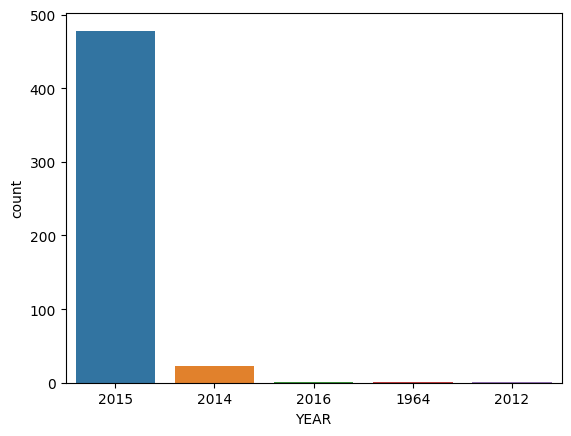

In [34]:
## Combein de film y'a t-il par année  dans fandango?
# Nous allons repondre à cette question en utilisant un graphique de comptagne

sns.countplot(fandango, x='YEAR', hue='YEAR')

# *Comme nous pouvons le constaté sur ce graphique, la plus part des films de fandangon sont des films de 2015, tres peu sont de 2014, et encore un film de 2016, 1964, et de 2012.*

In [36]:
## répresntation numérique
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

In [44]:
## Quels sont les 10 films  qui ont reçu le plus de votes?
#Utilisation de 'nlargest'

fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [43]:
#Utilisation de 'sort_values()'
fandango.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [46]:
## Combien de films n'ont aucun avis?

fandango.nsmallest(10,'RATING')

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
440,Big Significant Things (2015),0.0,0.0,0,2015
441,Caprice (2015),0.0,0.0,0,2015
442,Cas d&#233;sesp&#233;r&#233; (2015),0.0,0.0,0,2015
443,Chagall Malevich (2015),0.0,0.0,0,2015
444,Coffee Bloom (2015),0.0,0.0,0,2015


In [51]:
## Création  d'un dataframe avec les films qui ont été evalués.

film_evalué = fandango[fandango['VOTES'] > 0]

In [52]:
film_evalué

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


# **Comme indiqué dans l'article, en raison de l'affichage HTML et du classement par étoiles, la note réelle de l'utilisateur peut être légèrement differente de celle affichée sur le site. **
# **Visualisons cette difference avec un graphique KDE pour voir la distribution**

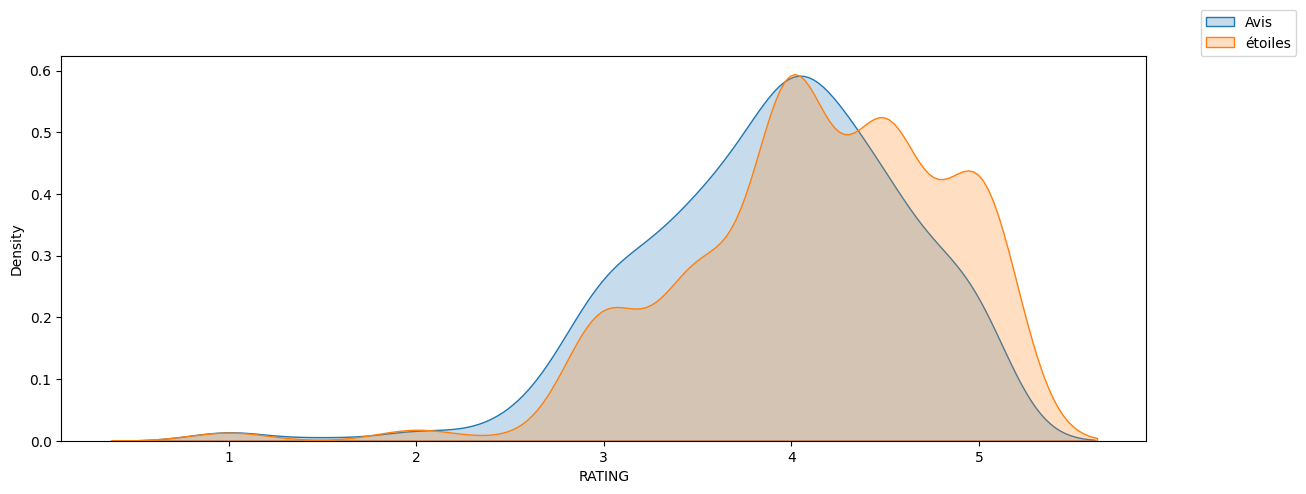

In [65]:
plt.figure(figsize=(14,5), dpi=100)
sns.kdeplot(film_evalué, x='RATING', fill=True, label='Avis')
sns.kdeplot(film_evalué, x='STARS', fill=True, label='étoiles')
plt.legend(loc=(1.05,1))